<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-notes/blob/main/cs195_segmentation_classical_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS195: Day13

### CS195: Computer Vision, Fall 2024

Wednesday, October 16th, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_syllabus_sp24.pdf)


Classical Image Segmentation
==

*   Image loading
*   Felzenswalb segmentation algorithm
*   SLIC segmentation algorithm





# Import python libararies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%shell
mkdir images
wget -P images https://analytics.drake.edu/~reza/teaching/cs195_fall24/datasets/horse.jpg
wget -P images https://analytics.drake.edu/~reza/teaching/cs195_fall24/datasets/seal.jpg

mkdir: cannot create directory ‘images’: File exists
--2024-10-16 18:49:50--  https://analytics.drake.edu/~reza/teaching/cs195_fall24/datasets/horse.jpg
Resolving analytics.drake.edu (analytics.drake.edu)... 198.7.223.92
Connecting to analytics.drake.edu (analytics.drake.edu)|198.7.223.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33352 (33K) [image/jpeg]
Saving to: ‘images/horse.jpg.1’

horse.jpg.1         100%[===================>]  32.57K  --.-KB/s    in 0.1s    

2024-10-16 18:49:50 (287 KB/s) - ‘images/horse.jpg.1’ saved [33352/33352]

--2024-10-16 18:49:50--  https://analytics.drake.edu/~reza/teaching/cs195_fall24/datasets/seal.jpg
Resolving analytics.drake.edu (analytics.drake.edu)... 198.7.223.92
Connecting to analytics.drake.edu (analytics.drake.edu)|198.7.223.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [image/jpeg]
Saving to: ‘images/seal.jpg.1’

seal.jpg.1          100%[===================>]  35.10K 

Text(0.5, 1.0, 'Felzenswalb graph-based segmentation')

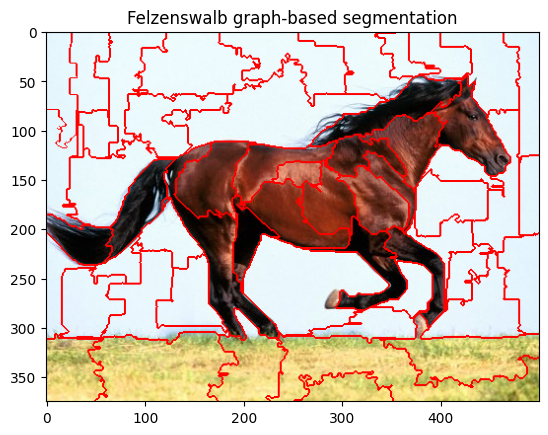

In [ ]:
# skimage has useful image processing modules, similar to sklearn's functionalities

from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
img = io.imread('/content/images/horse.jpg')
#img = io.imread('/content/images/seal.jpg')


# ------------------ Felzenswalb segmentation algorithm ------------------
segments = felzenszwalb(img, scale=4.0, sigma=0.95, min_size=800)
plt.imshow(mark_boundaries(img, segments, color=(1,0,0)))
plt.title('Felzenswalb graph-based segmentation')

In [ ]:
import matplotlib.pyplot as plt
import skimage
from skimage.draw import circle_perimeter
from skimage.filters import gaussian
import numpy as np
import skimage.io
from skimage.segmentation import mark_boundaries

#image_names = ['astronaut.png', 'coffee.png', 'camera.png', 'chelsea.png', 'coins.png',
#               'hubble_deep_field.png', 'logo.png', 'moon.png', 'page.png', 'text.png']

img = skimage.data.coffee()


'''
# similarly you could import other sample image from skimage
img = skimage.data.astronaut()
img = skimage.data.camera()
...
img = skimage.data.text()
'''

'\n# similarly you could import other sample image from skimage\nimg = skimage.data.astronaut()\nimg = skimage.data.camera()\n...\nimg = skimage.data.text()\n'

# Felzenswalb graph-based algorithm
- scale -- higher means larger clusters.
- sigma -- width (standard deviation) of Gaussian kernel used in preprocessing
- min_size -- minimum component size. Enforced using postprocessing.


Text(0.5, 1.0, 'Felzenswalb graph-based segmentation')

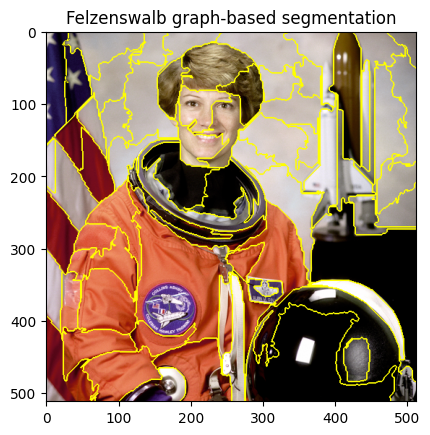

In [ ]:
from skimage.segmentation import felzenszwalb
img = skimage.data.astronaut()

# ------------------ Felzenswalb segmentation algorithm ------------------
segments = felzenszwalb(img, scale=3.0, sigma=0.95, min_size=800)
plt.imshow(mark_boundaries(img, segments))
plt.title('Felzenswalb graph-based segmentation')

# SLIC clustering based algorithm
- n_segment -- (approximate) number of labels in the segmented output image.
- compactness -- balances color proximity and space proximity


Text(0.5, 1.0, 'SLIC clustering-based segmentation')

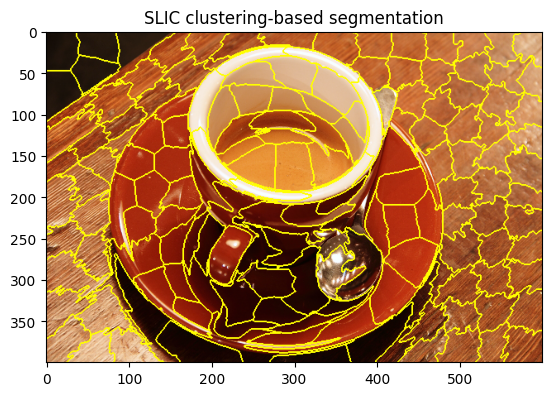

In [ ]:
from skimage.segmentation import slic

img = coffee()
# --------------- SLIC ---------------------
segments = slic(img, n_segments=200, compactness=10, sigma=1)
plt.imshow(np.asarray(segments))
plt.imshow(mark_boundaries(img, segments))
plt.title('SLIC clustering-based segmentation')